In [1]:
import pandas as pd

# Simulated databases
voters = {}
candidates = {}

votes = pd.DataFrame(columns=["voter_id", "candidate"])


In [7]:
def register_voter(voter_id, name):
    if voter_id in voters:
        print("❌ Voter already registered.")
    else:
        voters[voter_id] = {"name": name, "has_voted": False}
        print(f"✅ Voter {name} registered.")

def login_voter(voter_id):
    if voter_id in voters:
        print(f"🔐 Logged in as {voters[voter_id]['name']}")
        return voter_id
    else:
        print("❌ Voter not found.")
        return None

# Register voters

register_voter("v102", "Rahul")
register_voter("v103", "Dev")



❌ Voter already registered.
✅ Voter Dev registered.


In [8]:
# Candidate registration dictionary
candidates = {}

def register_candidate(candidate_name):
    if candidate_name in candidates:
        print("❌ Candidate already exists.")
    else:
        candidates[candidate_name] = 0
        print(f"🎯 Candidate '{candidate_name}' registered.")

# Register candidates
register_candidate("Alice")
register_candidate("Bob")
register_candidate("Charlie")


🎯 Candidate 'Alice' registered.
🎯 Candidate 'Bob' registered.
🎯 Candidate 'Charlie' registered.


In [9]:
import pandas as pd

# Create a DataFrame to store vote records
votes = pd.DataFrame(columns=["voter_id", "candidate"])

def cast_vote(voter_id, candidate_name):
    if voter_id not in voters:
        print("❌ Invalid voter.")
        return
    if voters[voter_id]["has_voted"]:
        print("⚠️ You have already voted!")
        return
    if candidate_name not in candidates:
        print("❌ Candidate not found.")
        return

    # Register vote
    global votes
    votes = pd.concat([
        votes,
        pd.DataFrame([{"voter_id": voter_id, "candidate": candidate_name}])
    ], ignore_index=True)

    candidates[candidate_name] += 1
    voters[voter_id]["has_voted"] = True
    print(f"🗳️ Vote cast for {candidate_name}!")

# Login and vote
voter = login_voter("v102")
cast_vote(voter, "Alice")

voter2 = login_voter("v103")
cast_vote(voter2, "Bob")


🔐 Logged in as Rahul
🗳️ Vote cast for Alice!
🔐 Logged in as Dev
🗳️ Vote cast for Bob!


In [10]:
def show_results():
    print("📊 Voting Results:")
    result_df = pd.DataFrame.from_dict(candidates, orient='index', columns=['Votes'])
    result_df = result_df.sort_values(by='Votes', ascending=False)
    display(result_df)

# Show current results
show_results()


📊 Voting Results:


,Votes
Alice,1
Bob,1
Charlie,0


In [11]:
votes.to_csv("voting_results.csv", index=False)
print("✅ Voting results exported to 'voting_results.csv'")


✅ Voting results exported to 'voting_results.csv'


/tmp/ipython-input-12-2327298102.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


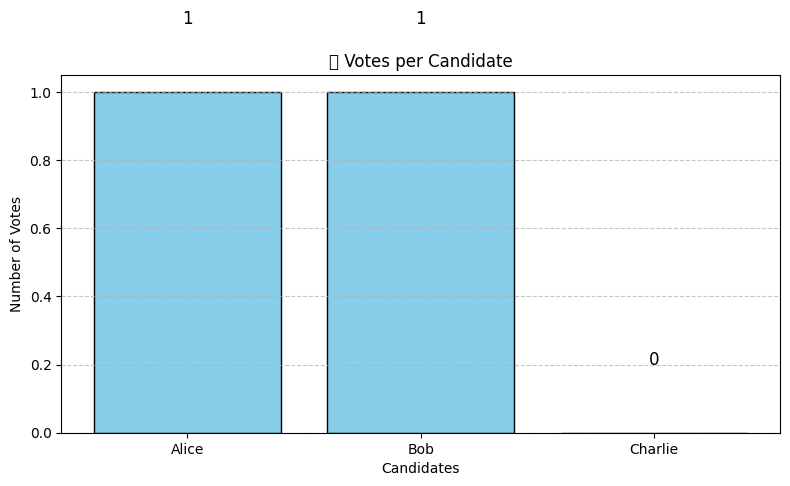

In [12]:
import matplotlib.pyplot as plt

def plot_results_bar():
    names = list(candidates.keys())
    vote_counts = list(candidates.values())

    plt.figure(figsize=(8, 5))
    bars = plt.bar(names, vote_counts, color='skyblue', edgecolor='black')

    # Add vote count labels above each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, int(yval), ha='center', fontsize=12)

    plt.title("📊 Votes per Candidate")
    plt.xlabel("Candidates")
    plt.ylabel("Number of Votes")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Call this to show the chart
plot_results_bar()
